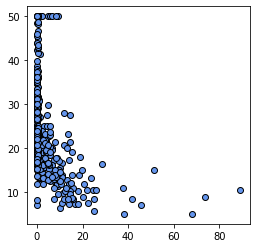

In [26]:
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline

#ボストン住宅価格データセットの読み込み
from sklearn.datasets import load_boston

boston = load_boston()

# 説明変数
X_array = boston.data
# 1カラム目（CRIM）を取得
X=X_array[:,0]
# 目的変数
y_array = boston.target
Y=y_array

plt.figure(figsize=(4,4))
plt.plot(X,Y,marker='o',linestyle='None',markeredgecolor='black',color='cornflowerblue')


[0.00632 0.02731 0.02729 0.03237 0.06905 0.02985 0.08829 0.14455 0.21124
 0.17004 0.22489 0.11747 0.09378 0.62976 0.63796]


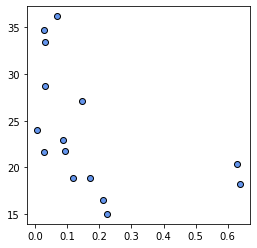

In [50]:
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline

#ボストン住宅価格データセットの読み込み
from sklearn.datasets import load_boston

boston = load_boston()

#説明変数
X_array = boston.data
# 1カラム目（CRIM）を取得
X=X_array[:,0]
#目的変数
y_array = boston.target
Y=y_array

plt.figure(figsize=(4,4))
# 0番目から15番目のデータをプロット
plt.plot(X[0:15],Y[0:15],marker='o',linestyle='None',markeredgecolor='black',color='cornflowerblue')


[-16.03069468]
26.562651256893634
0.23087204323047003


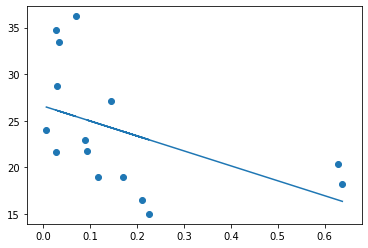

In [37]:
# sklearn.linear_model.LinearRegression クラスを読み込み
from sklearn import linear_model
import pandas as pd
import numpy as npy
import matplotlib.pyplot as plt
#ボストン住宅価格データセットの読み込み
from sklearn.datasets import load_boston

clf = linear_model.LinearRegression()

boston = load_boston()

#説明変数
X_array = boston.data
#目的変数
y_array = boston.target

X = npy.array([X_array[:,0][0:15]]).T
Y = y_array[0:15]

# 予測モデルを作成
clf.fit(X, Y)
# 回帰係数
print(clf.coef_)
# 切片 (誤差)
print(clf.intercept_)
# 決定係数
print(clf.score(X, Y))

# 散布図
plt.scatter(X, Y)
# 回帰直線
plt.plot(X, clf.predict(X))

15
[0.         0.33333333 0.66666667 1.        ]


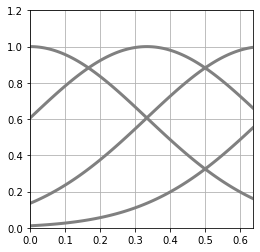

In [8]:
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline

#ボストン住宅価格データセットの読み込み
from sklearn.datasets import load_boston

boston = load_boston()

#説明変数
X_array = boston.data
#目的変数
y_array = boston.target

X = npy.array([X_array[:,0][0:15]])
Y = y_array[0:15]


X_min = 0
X_max = max(max(X))
X_n = len(X[0])
print(X_n)

def gauss( x, mu, s):
    return npy.exp(-(x-mu)**2 / (2*s**2))

M = 4
plt.figure(figsize=(4, 4))
mu = npy.linspace(0,1, M)
print(mu)
s = mu[1] - mu[0]
xb = npy.linspace(X_min, X_max, 100)

for j in range(M):
    y = gauss(xb, mu[j], s)
    plt.plot(xb, y, color='gray',linewidth=3)

plt.grid(True)
plt.xlim(X_min, X_max)
plt.ylim(0,1.2)
plt.show()

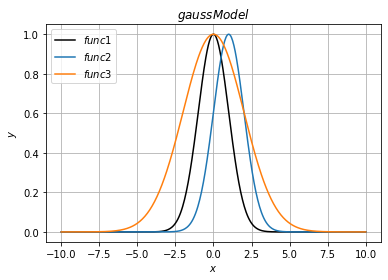

In [7]:
# ライブラリのインポート
import numpy as npy
import matplotlib.pyplot as plt
# Jupiter Notebookで結果を表示するためのおまじない
%matplotlib inline
# 関数の定義
def f1(x,mu,s):
    return npy.exp(-(x-mu)**2/(2*s**2))

# X軸に0から9までの配列
xline = npy.linspace(-10,10,500)
yline1 = f1(xline,0,1)
yline2 = f1(xline,1,1)
yline3 = f1(xline,0,2)

# pltに要素を設定する
plt.plot(xline, yline1, color ='black', label='$func1$')
plt.plot(xline, yline2, label='$func2$')
plt.plot(xline, yline3, label='$func3$')

# 凡例を表示する
plt.legend(loc="upper left")

# タイトルを表示する
plt.title('$gaussModel$')
# X軸に名前を付ける
plt.xlabel('$x$')
# Y軸に名前を付ける
plt.ylabel('$y$')
# グリッドを表示する
plt.grid(True)

# グラフを描写する
plt.show()

W=[16.8 -5.9 -1.5  5.6 15.7]
SD=6.02cm


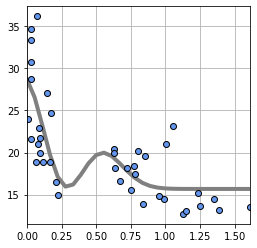

In [2]:
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline

#ボストン住宅価格データセットの読み込み
from sklearn.datasets import load_boston

def gauss( x, mu, s):
    #return 1+s/(x+mu)
    return npy.exp(-(x-mu)**2 / (2*s**2))

def gauss_func(w,x):
    m = len(w) -1
    mu = npy.linspace(0,0.5,m)
    s = mu[1] -mu[0]
    y = npy.zeros_like(x)
    for j in range(m):
        y = y + w[j]*gauss(x, mu[j], s)
    y = y + w[m]
    return y

def mse_gauss_func(x, t, w):
    y = gauss_func(w, x)
    mse = npy.mean((y-t)**2)
    return mse

def fit_gauss_func(x,t,m):
    mu = npy.linspace(0,0.5,m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    phi = npy.ones((n,m+1))
    for j in range(m):
        phi[:,j] = gauss(x,mu[j],s)
    
    phi_T = npy.transpose(phi)
    
    b = npy.linalg.inv(phi_T.dot(phi))
    c = b.dot(phi_T)
    w = c.dot(t)
    return w

def show_gauss_func(w):
    xb = npy.linspace(X_min, X_max, 30)
    y = gauss_func(w, xb)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4)

boston = load_boston()

#説明変数
X_array = boston.data
#目的変数
y_array = boston.target

X = npy.array([X_array[:,0][0:40]])
Y = y_array[0:40]

xline = X[0]
yline = Y

X_min = 0
X_max = max(max(X))
X_n = len(X[0])

plt.figure(figsize=(4,4))
M = 4
W = fit_gauss_func(xline,yline,M)
show_gauss_func(W)

plt.plot(xline,yline,marker='o',linestyle='None',markeredgecolor='black',color='cornflowerblue')
plt.xlim(X_min, X_max)

plt.grid(True)
mse = mse_gauss_func(X[0],Y[0],W)
print('W=' + str(npy.round(W,1)))
print("SD={0:.2f}cm".format(npy.sqrt(mse)))
plt.show()